Importar as bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import math
import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

from xgboost import XGBClassifier

from hyperopt import fmin, tpe, hp, SparkTrials, Trials, STATUS_OK

import mlflow 
import mlflow.sklearn
from mlflow.tracking import MlflowClient

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 50)

Importar o conjunto de dados HR Analytics: Case Study baixado do Kaggle 
https://www.kaggle.com/datasets/bhanupratapbiswas/hr-analytics-case-study?


In [2]:
df = pd.read_csv("hr_analytics_kaggle.csv")
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
0                  1                        2  Female          94   
1                  2                        3    Male          61   
2                  4                        4    Male          92   
3                  5                        4  Female          56   
4                  7                        1    Male          40   
...              ...                      ...     ...         ...   
1465            2061                        3    Male          41   
1466            2062                        4    Male          42   
1467            2064                        2    Male          87   
1468            2065                        4    Male          63   
1469            2068                        2    Male          82   

      JobInvolvement  JobLevel                    JobRole  JobSatisfaction  \
0                  3         2            Sales Executive                4   
1                  2         2         Research Scientist                2   
2                  2         1      Laboratory Technician                3   
3                  3         1         Research Scientist                3   
4                  3         1      Laboratory Technician                2   
...              ...       ...                        ...              ...   
1465               4         2      Laboratory Technician                4   
1466               2         3  Healthcare Representative                1   
1467               4         2     Manufacturing Director                2   
1468               2         2            Sales Executive                2   
1469               4         2      Laboratory Technician                3   

     MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18  \
0           Single           5993        19479                   8      Y   
1          Married           5130        24907                   1      Y   
2           Single           2090         2396                   6      Y   
3          Married           2909        23159                   1      Y   
4          Married           3468        16632                   9      Y   
...            ...            ...          ...  

Análise exploratória dos dados

In [3]:
#Visualizar as colunas do dataframe
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
#Visualizar as colunas do dataframe, quantidade de nulos e o tipo da coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
#Visualizar as colunas do dataframe com valores de exemplo e para as numéricas algumas métricas

for col in df.columns.values:
    
    if df[col].dtype == object:
        print("{}, tipo {}: {}".format(col, df[col].dtype, df[col].unique()[:5]))
        print()
    else:
        print("{}, tipo {}: {}".format(col, df[col].dtype, df[col].unique()[:5]))
        print("Min: {:.1f}, Max: {:.1f}, Média {:.1f}, Mediana {:.1f}"
              .format(df[col].min(), df[col].max(), df[col].mean(), df[col].median()))
        print()
    

Age, tipo int64: [41 49 37 33 27]
Min: 18.0, Max: 60.0, Média 36.9, Mediana 36.0

Attrition, tipo object: ['Yes' 'No']

BusinessTravel, tipo object: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

DailyRate, tipo int64: [1102  279 1373 1392  591]
Min: 102.0, Max: 1499.0, Média 802.5, Mediana 802.0

Department, tipo object: ['Sales' 'Research & Development' 'Human Resources']

DistanceFromHome, tipo int64: [ 1  8  2  3 24]
Min: 1.0, Max: 29.0, Média 9.2, Mediana 7.0

Education, tipo int64: [2 1 4 3 5]
Min: 1.0, Max: 5.0, Média 2.9, Mediana 3.0

EducationField, tipo object: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree']

EmployeeCount, tipo int64: [1]
Min: 1.0, Max: 1.0, Média 1.0, Mediana 1.0

EmployeeNumber, tipo int64: [1 2 4 5 7]
Min: 1.0, Max: 2068.0, Média 1024.9, Mediana 1020.5

EnvironmentSatisfaction, tipo int64: [2 3 4 1]
Min: 1.0, Max: 4.0, Média 2.7, Mediana 3.0

Gender, tipo object: ['Female' 'Male']

HourlyRate, tipo int64: [94 61 92 56 40]
Min: 30.0

In [6]:
#Contar quantos valores distintos a coluna possui
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [3]:
#Excluindo colunas que possuem somente um valor ou é ID

df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis=1 , inplace=True)
df.head(5)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  HourlyRate  JobInvolvement  JobLevel                JobRole  \
0  Female          94               3         2        Sales Executive   
1    Male          61               2         2     Research Scientist   
2    Male          92               2         1  Laboratory Technician   
3  Female          56               3         1     Research Scientist   
4    Male          40               3         1  Laboratory Technician   

   JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                4        Single           5993        19479   
1                2       Married           5130        24907   
2                3        Single           2090         2396   
3                3       Married           2909        23159   
4                2       Married           3468        16632   

   NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  \
0                   8      Yes                 11                  3   
1                   1       No                 23                  4   
2                   6      Yes                 15                  3   
3                   1      Yes                 11                  3   
4                   9       No                 12                  3   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                         1                 0                  8   
1                         4                 1                 10   
2                         2                 0                  7   
3                         3                 0                  8   
4                         4                 1                  6   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0                1               6                   4   
1                      3                3              10                   7   
2                      3                3               0                   0   
3                      3                3               8                   7   
4                      3                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [8]:
#Contar quantos valores nulos a coluna possui
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [9]:
#Verificar para as variáveis catégorias o valor que aparece menos frequentemente

for col in df.columns.values:
    
    if df[col].dtype == object:
        freq = Counter(df[col]).most_common()[-1]
        print("Na coluna {} o valor menos frequente é {} com {} vezes"
              .format(col, freq[0], freq[1]))
        print()   

Na coluna Attrition o valor menos frequente é Yes com 237 vezes

Na coluna BusinessTravel o valor menos frequente é Non-Travel com 150 vezes

Na coluna Department o valor menos frequente é Human Resources com 63 vezes

Na coluna EducationField o valor menos frequente é Human Resources com 27 vezes

Na coluna Gender o valor menos frequente é Female com 588 vezes

Na coluna JobRole o valor menos frequente é Human Resources com 52 vezes

Na coluna MaritalStatus o valor menos frequente é Divorced com 327 vezes

Na coluna OverTime o valor menos frequente é Yes com 416 vezes



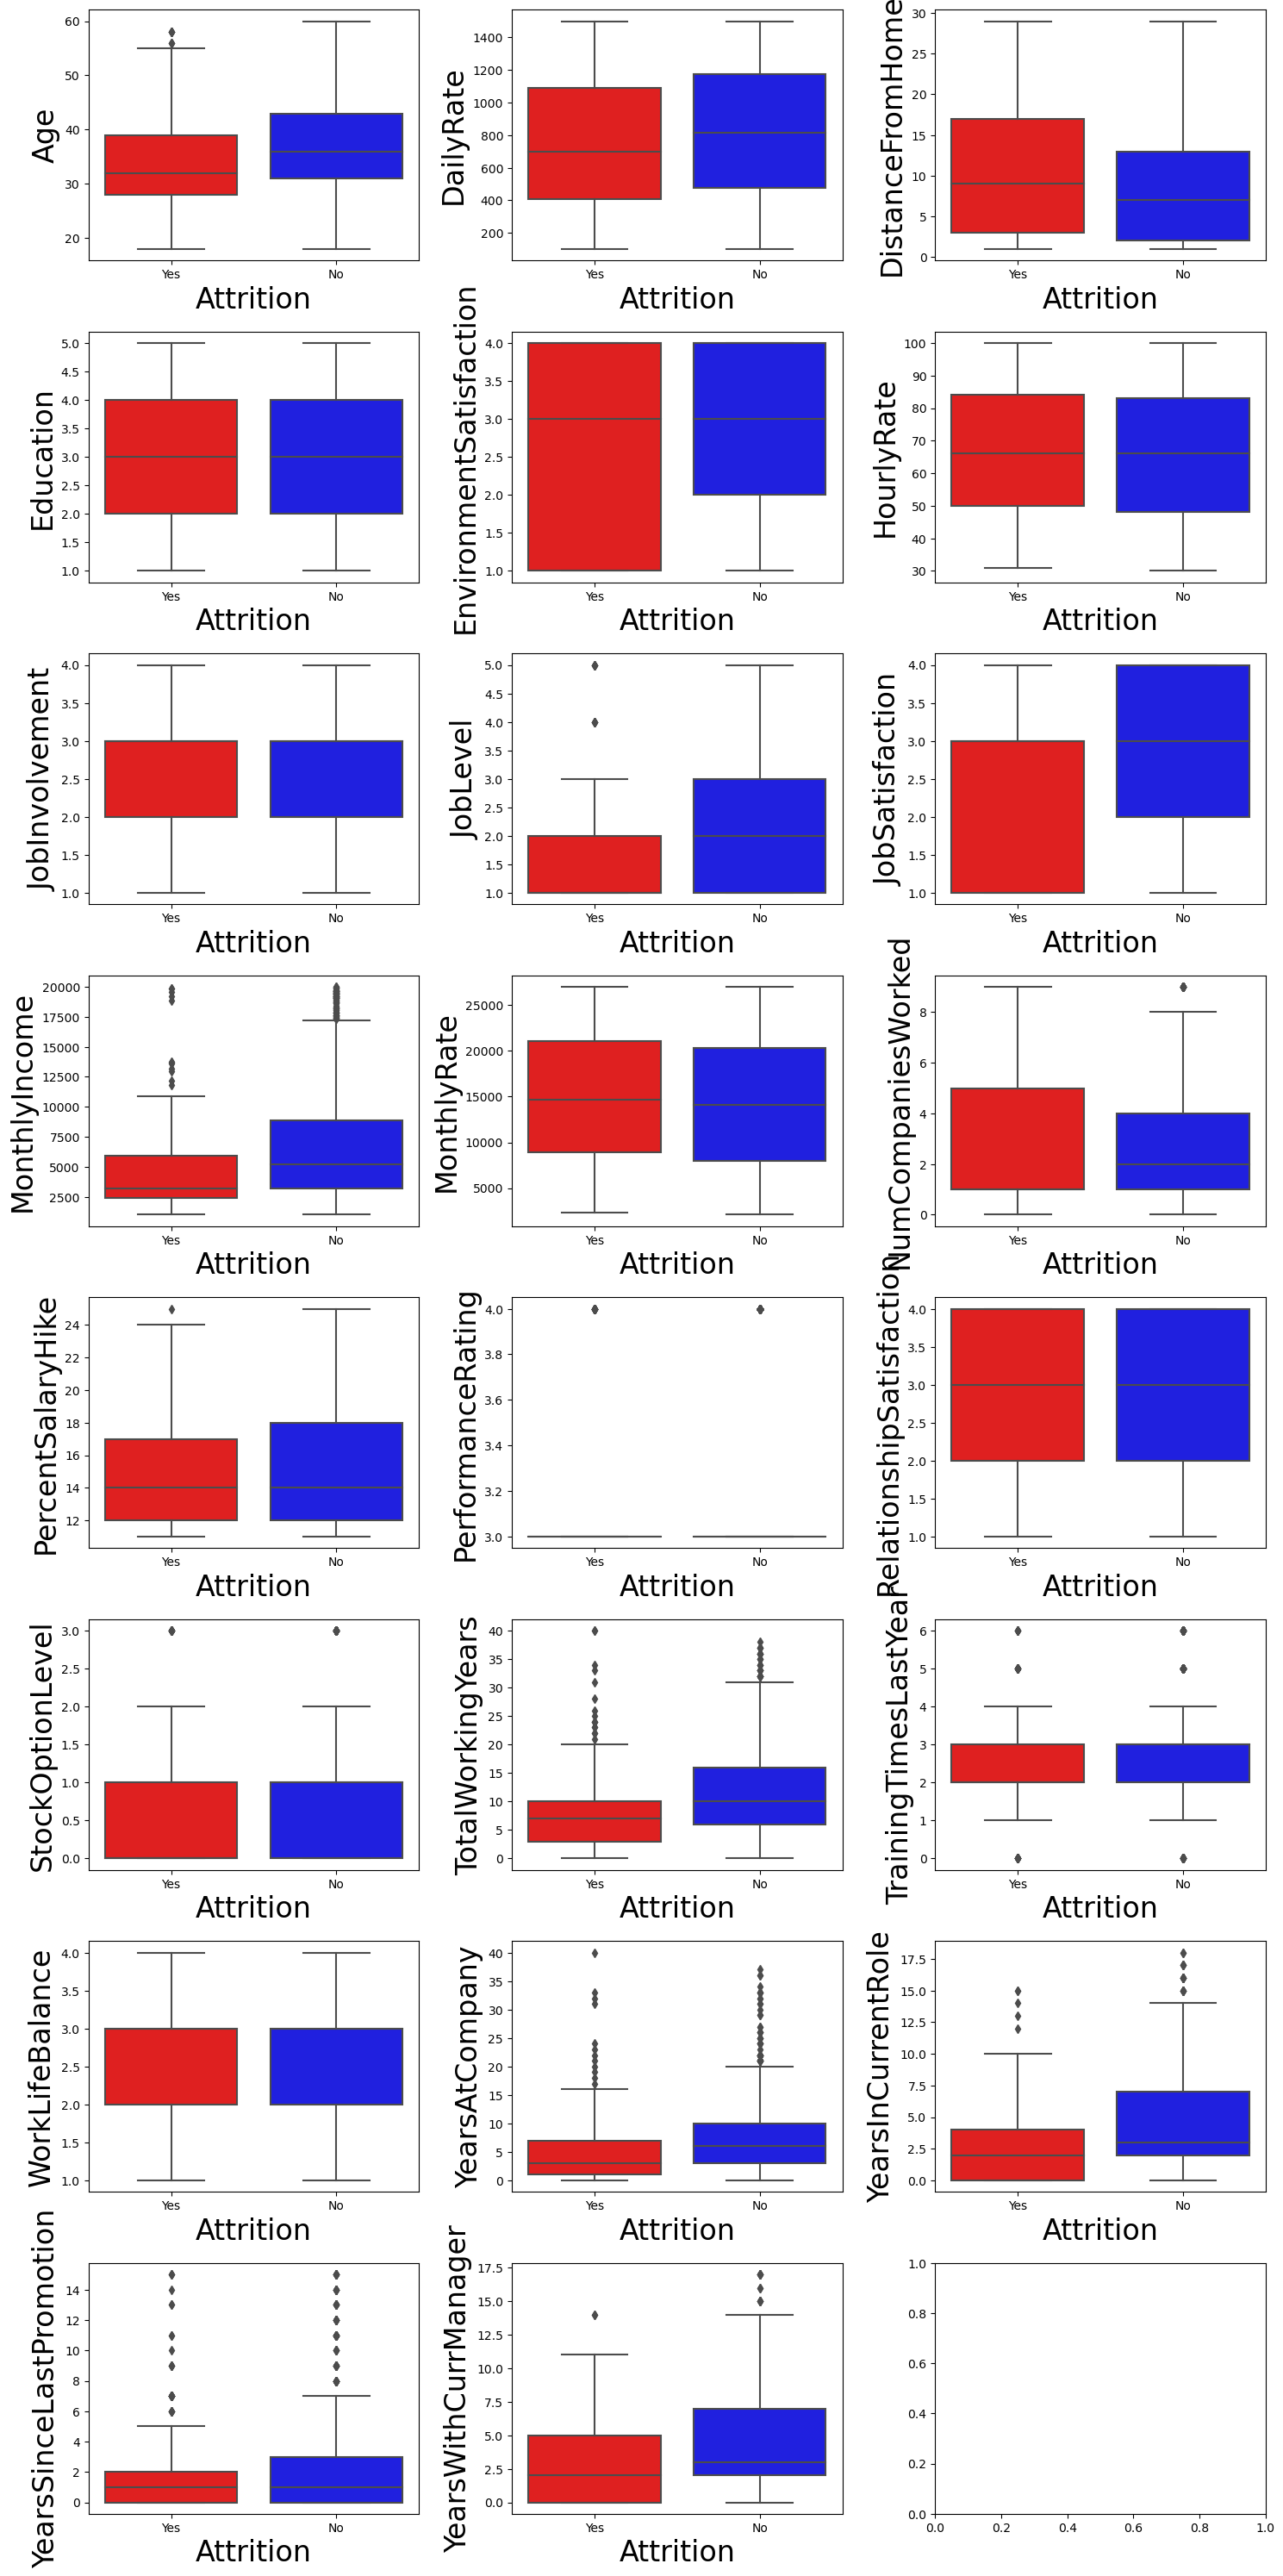

In [10]:
#Plotar gráficos boxplot para as variáveis numéricas segmentando em Turnover Sim ou Não.

col_num = df.select_dtypes(exclude = object).columns
y = 3
x = math.ceil(len(col_num)/y)

plt.rcParams["figure.figsize"] = [15, 10 * y]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.labelsize"] = 24

f, axes = plt.subplots(x,y)

row , column = 0 , 0
for col in col_num:
    sns.boxplot( data = df, x = 'Attrition', y = col, ax = axes[row][column], 
                 palette = {'Yes': '#FF0000', 'No' : '#0000FF'})
    column += 1
    if column == y:
        row += 1
        column = 0 

plt.show()

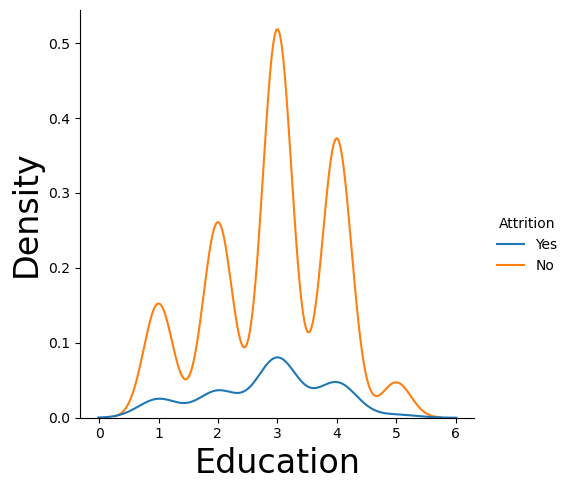

In [11]:
sns.displot(data = df, x = 'Education' , hue = "Attrition",  kind="kde")

In [12]:
#Base com funcionários inativos
turnover_yes = df.loc[df['Attrition'] == 'Yes']
turnover_yes.describe()

Age    DailyRate  DistanceFromHome   Education  \
count  237.000000   237.000000        237.000000  237.000000   
mean    33.607595   750.362869         10.632911    2.839662   
std      9.689350   401.899519          8.452525    1.008244   
min     18.000000   103.000000          1.000000    1.000000   
25%     28.000000   408.000000          3.000000    2.000000   
50%     32.000000   699.000000          9.000000    3.000000   
75%     39.000000  1092.000000         17.000000    4.000000   
max     58.000000  1496.000000         29.000000    5.000000   

       EnvironmentSatisfaction  HourlyRate  JobInvolvement    JobLevel  \
count               237.000000  237.000000      237.000000  237.000000   
mean                  2.464135   65.573840        2.518987    1.637131   
std                   1.169791   20.099958        0.773405    0.940594   
min                   1.000000   31.000000        1.000000    1.000000   
25%                   1.000000   50.000000        2.000000    1.000000   
50%                   3.000000   66.000000        3.000000    1.000000   
75%                   4.000000   84.000000        3.000000    2.000000   
max                   4.000000  100.000000        4.000000    5.000000   

       JobSatisfaction  MonthlyIncome   MonthlyRate  NumCompaniesWorked  \
count       237.000000     237.000000    237.000000          237.000000   
mean          2.468354    4787.092827  14559.308017            2.940928   
std           1.118058    3640.210367   7208.153264            2.678519   
min           1.000000    1009.000000   2326.000000            0.000000   
25%           1.000000    2373.000000   8870.000000            1.000000   
50%           3.000000    3202.000000  14618.000000            1.000000   
75%           3.000000    5916.000000  21081.000000            5.000000   
max           4.000000   19859.000000  26999.000000            9.000000   

       PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
count         237.000000         237.000000                237.000000   
mean           15.097046           3.156118                  2.599156   
std             3.770294           0.363735                  1.125437   
min            11.000000           3.000000                  1.000000   
25%            12.000000           3.000000                  2.000000   
50%            14.000000           3.000000                  3.000000   
75%            17.000000           3.000000                  4.000000   
max            25.000000           4.000000                  4.000000   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count        237.000000         237.000000             237.000000   
mean           0.527426           8.244726               2.624473   
std            0.856361           7.169204               1.254784   
min            0.000000           0.000000               0.000000   
25%            0.000000           3.000000               2.000000   
50%            0.000000           7.000000               2.000000   
75%            1.000000          10.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count       237.000000      237.000000          237.000000   
mean          2.658228        5.130802            2.902954   
std           0.816453        5.949984            3.174827   
min           1.000000        0.000000            0.000000   
25%           2.000000        1.000000            0.000000   
50%           3.000000        3.000000            2.000000   
75%           3.000000        7.000000            4.000000   
max           4.000000       40.000000           15.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count               237.000000            237.000000  
mean                  1.945148              2.852321  
std                   3.153077              3.143349  
min                   0.000000     

In [13]:
#Base com funcionários ativos
turnover_no = df.loc[df['Attrition'] == 'No']
turnover_no.describe()

Age    DailyRate  DistanceFromHome    Education  \
count  1233.000000  1233.000000       1233.000000  1233.000000   
mean     37.561233   812.504461          8.915653     2.927007   
std       8.888360   403.208379          8.012633     1.027002   
min      18.000000   102.000000          1.000000     1.000000   
25%      31.000000   477.000000          2.000000     2.000000   
50%      36.000000   817.000000          7.000000     3.000000   
75%      43.000000  1176.000000         13.000000     4.000000   
max      60.000000  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              1233.000000  1233.000000     1233.000000  1233.000000   
mean                  2.771290    65.952149        2.770479     2.145985   
std                   1.071132    20.380754        0.692050     1.117933   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.000000    48.000000        2.000000     1.000000   
50%                   3.000000    66.000000        3.000000     2.000000   
75%                   4.000000    83.000000        3.000000     3.000000   
max                   4.000000   100.000000        4.000000     5.000000   

       JobSatisfaction  MonthlyIncome   MonthlyRate  NumCompaniesWorked  \
count      1233.000000    1233.000000   1233.000000          1233.00000   
mean          2.778589    6832.739659  14265.779400             2.64558   
std           1.093277    4818.208001   7102.260749             2.46009   
min           1.000000    1051.000000   2094.000000             0.00000   
25%           2.000000    3211.000000   7973.000000             1.00000   
50%           3.000000    5204.000000  14120.000000             2.00000   
75%           4.000000    8834.000000  20364.000000             4.00000   
max           4.000000   19999.000000  26997.000000             9.00000   

       PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
count        1233.000000        1233.000000               1233.000000   
mean           15.231144           3.153285                  2.733982   
std             3.639511           0.360408                  1.071603   
min            11.000000           3.000000                  1.000000   
25%            12.000000           3.000000                  2.000000   
50%            14.000000           3.000000                  3.000000   
75%            18.000000           3.000000                  4.000000   
max            25.000000           4.000000                  4.000000   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1233.000000        1233.000000            1233.000000   
mean           0.845093          11.862936               2.832928   
std            0.841985           7.760719               1.293585   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          16.000000               3.000000   
max            3.000000          38.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1233.000000     1233.000000         1233.000000   
mean          2.781022        7.369019            4.484185   
std           0.681907        6.096298            3.649402   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        6.000000            3.000000   
75%           3.000000       10.000000            7.000000   
max           4.000000       37.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1233.000000           1233.000000  
mean                  2.234388              4.367397  
std                   3.234762              3.594116  


In [14]:
#Contando a quantidade para os valores de turnover
df.Attrition.value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [4]:
#Transformando Attrition em uma variável binária Turnover

df.loc[df['Attrition'] == 'Yes', 'turnover'] = 1
df.loc[df['Attrition'] == 'No', 'turnover'] = 0
df.drop(['Attrition'], axis=1 , inplace=True)
df = df.astype({'turnover':'int'})
df

Age     BusinessTravel  DailyRate              Department  \
0      41      Travel_Rarely       1102                   Sales   
1      49  Travel_Frequently        279  Research & Development   
2      37      Travel_Rarely       1373  Research & Development   
3      33  Travel_Frequently       1392  Research & Development   
4      27      Travel_Rarely        591  Research & Development   
...   ...                ...        ...                     ...   
1465   36  Travel_Frequently        884  Research & Development   
1466   39      Travel_Rarely        613  Research & Development   
1467   27      Travel_Rarely        155  Research & Development   
1468   49  Travel_Frequently       1023                   Sales   
1469   34      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                    1          2  Life Sciences                        2   
1                    8          1  Life Sciences                        3   
2                    2          2          Other                        4   
3                    3          4  Life Sciences                        4   
4                    2          1        Medical                        1   
...                ...        ...            ...                      ...   
1465                23          2        Medical                        3   
1466                 6          1        Medical                        4   
1467                 4          3  Life Sciences                        2   
1468                 2          3        Medical                        4   
1469                 8          3        Medical                        2   

      Gender  HourlyRate  JobInvolvement  JobLevel                    JobRole  \
0     Female          94               3         2            Sales Executive   
1       Male          61               2         2         Research Scientist   
2       Male          92               2         1      Laboratory Technician   
3     Female          56               3         1         Research Scientist   
4       Male          40               3         1      Laboratory Technician   
...      ...         ...             ...       ...                        ...   
1465    Male          41               4         2      Laboratory Technician   
1466    Male          42               2         3  Healthcare Representative   
1467    Male          87               4         2     Manufacturing Director   
1468    Male          63               2         2            Sales Executive   
1469    Male          82               4         2      Laboratory Technician   

      JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                   4        Single           5993        19479   
1                   2       Married           5130        24907   
2                   3        Single           2090         2396   
3                   3       Married           2909        23159   
4                   2       Married           3468        16632   
...               ...           ...            ...          ...   
1465                4       Married           2571        12290   
1466                1       Married           9991        21457   
1467                2       Married           6142         5174   
1468                2       Married           5390        13243   
1469                3       Married           4404        10228   

      NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  \
0                      8      Yes                 11                  3   
1                      1       No                 23                  4   
2                      6      Yes                 15                  3   
3                      1      Yes                 11                  3   
4                      9       No                 12                  3   
...                  ...      ...               

<Axes: xlabel='StockOptionLevel'>

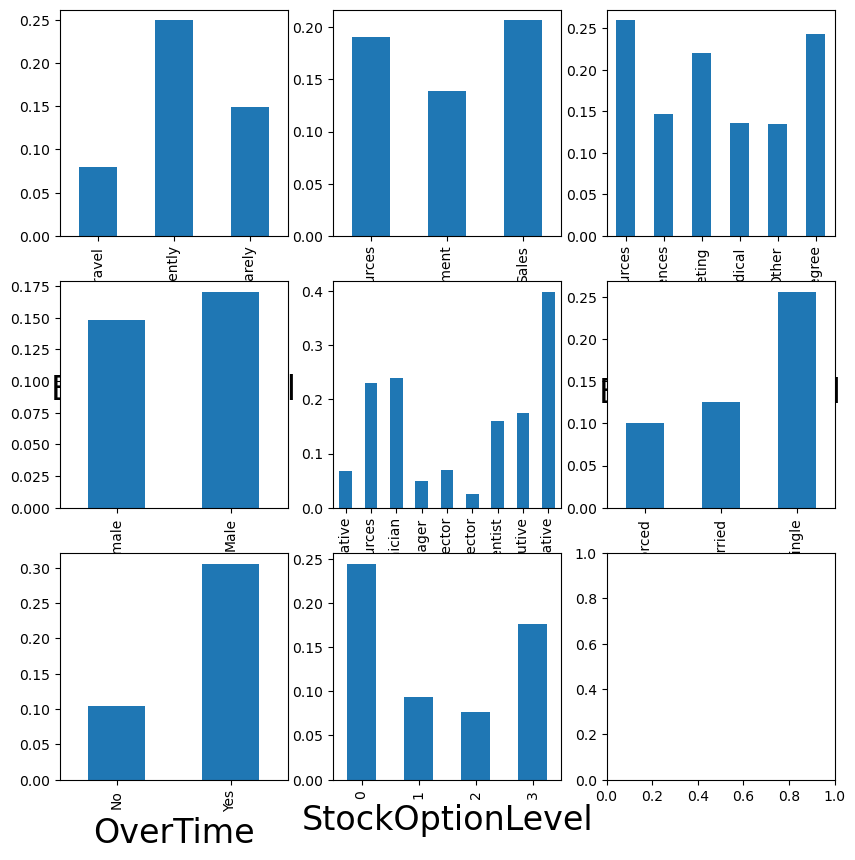

In [16]:
#Plotando os gráficos das variáveis categóricas por valor e comparando com o turnover geral de 16%

f, ax = plt.subplots(3, 3, figsize = (10,10), constrained_layout = False)

aux = df.groupby(['BusinessTravel'])['turnover'].mean()
aux.plot(kind = 'bar', ax = ax[0,0])

aux = df.groupby(['Department'])['turnover'].mean()
aux.plot(kind = 'bar', ax = ax[0,1])

aux = df.groupby(['EducationField'])['turnover'].mean()
aux.plot(kind = 'bar', ax = ax[0,2])

aux = df.groupby(['Gender'])['turnover'].mean()
aux.plot(kind = 'bar', ax = ax[1,0])

aux = df.groupby(['JobRole'])['turnover'].mean()
aux.plot(kind = 'bar', ax = ax[1,1])

aux = df.groupby(['MaritalStatus'])['turnover'].mean()
aux.plot(kind = 'bar', ax = ax[1,2])

aux = df.groupby(['OverTime'])['turnover'].mean()
aux.plot(kind = 'bar', ax = ax[2,0])

aux = df.groupby(['StockOptionLevel'])['turnover'].mean()
aux.plot(kind = 'bar', ax = ax[2,1])


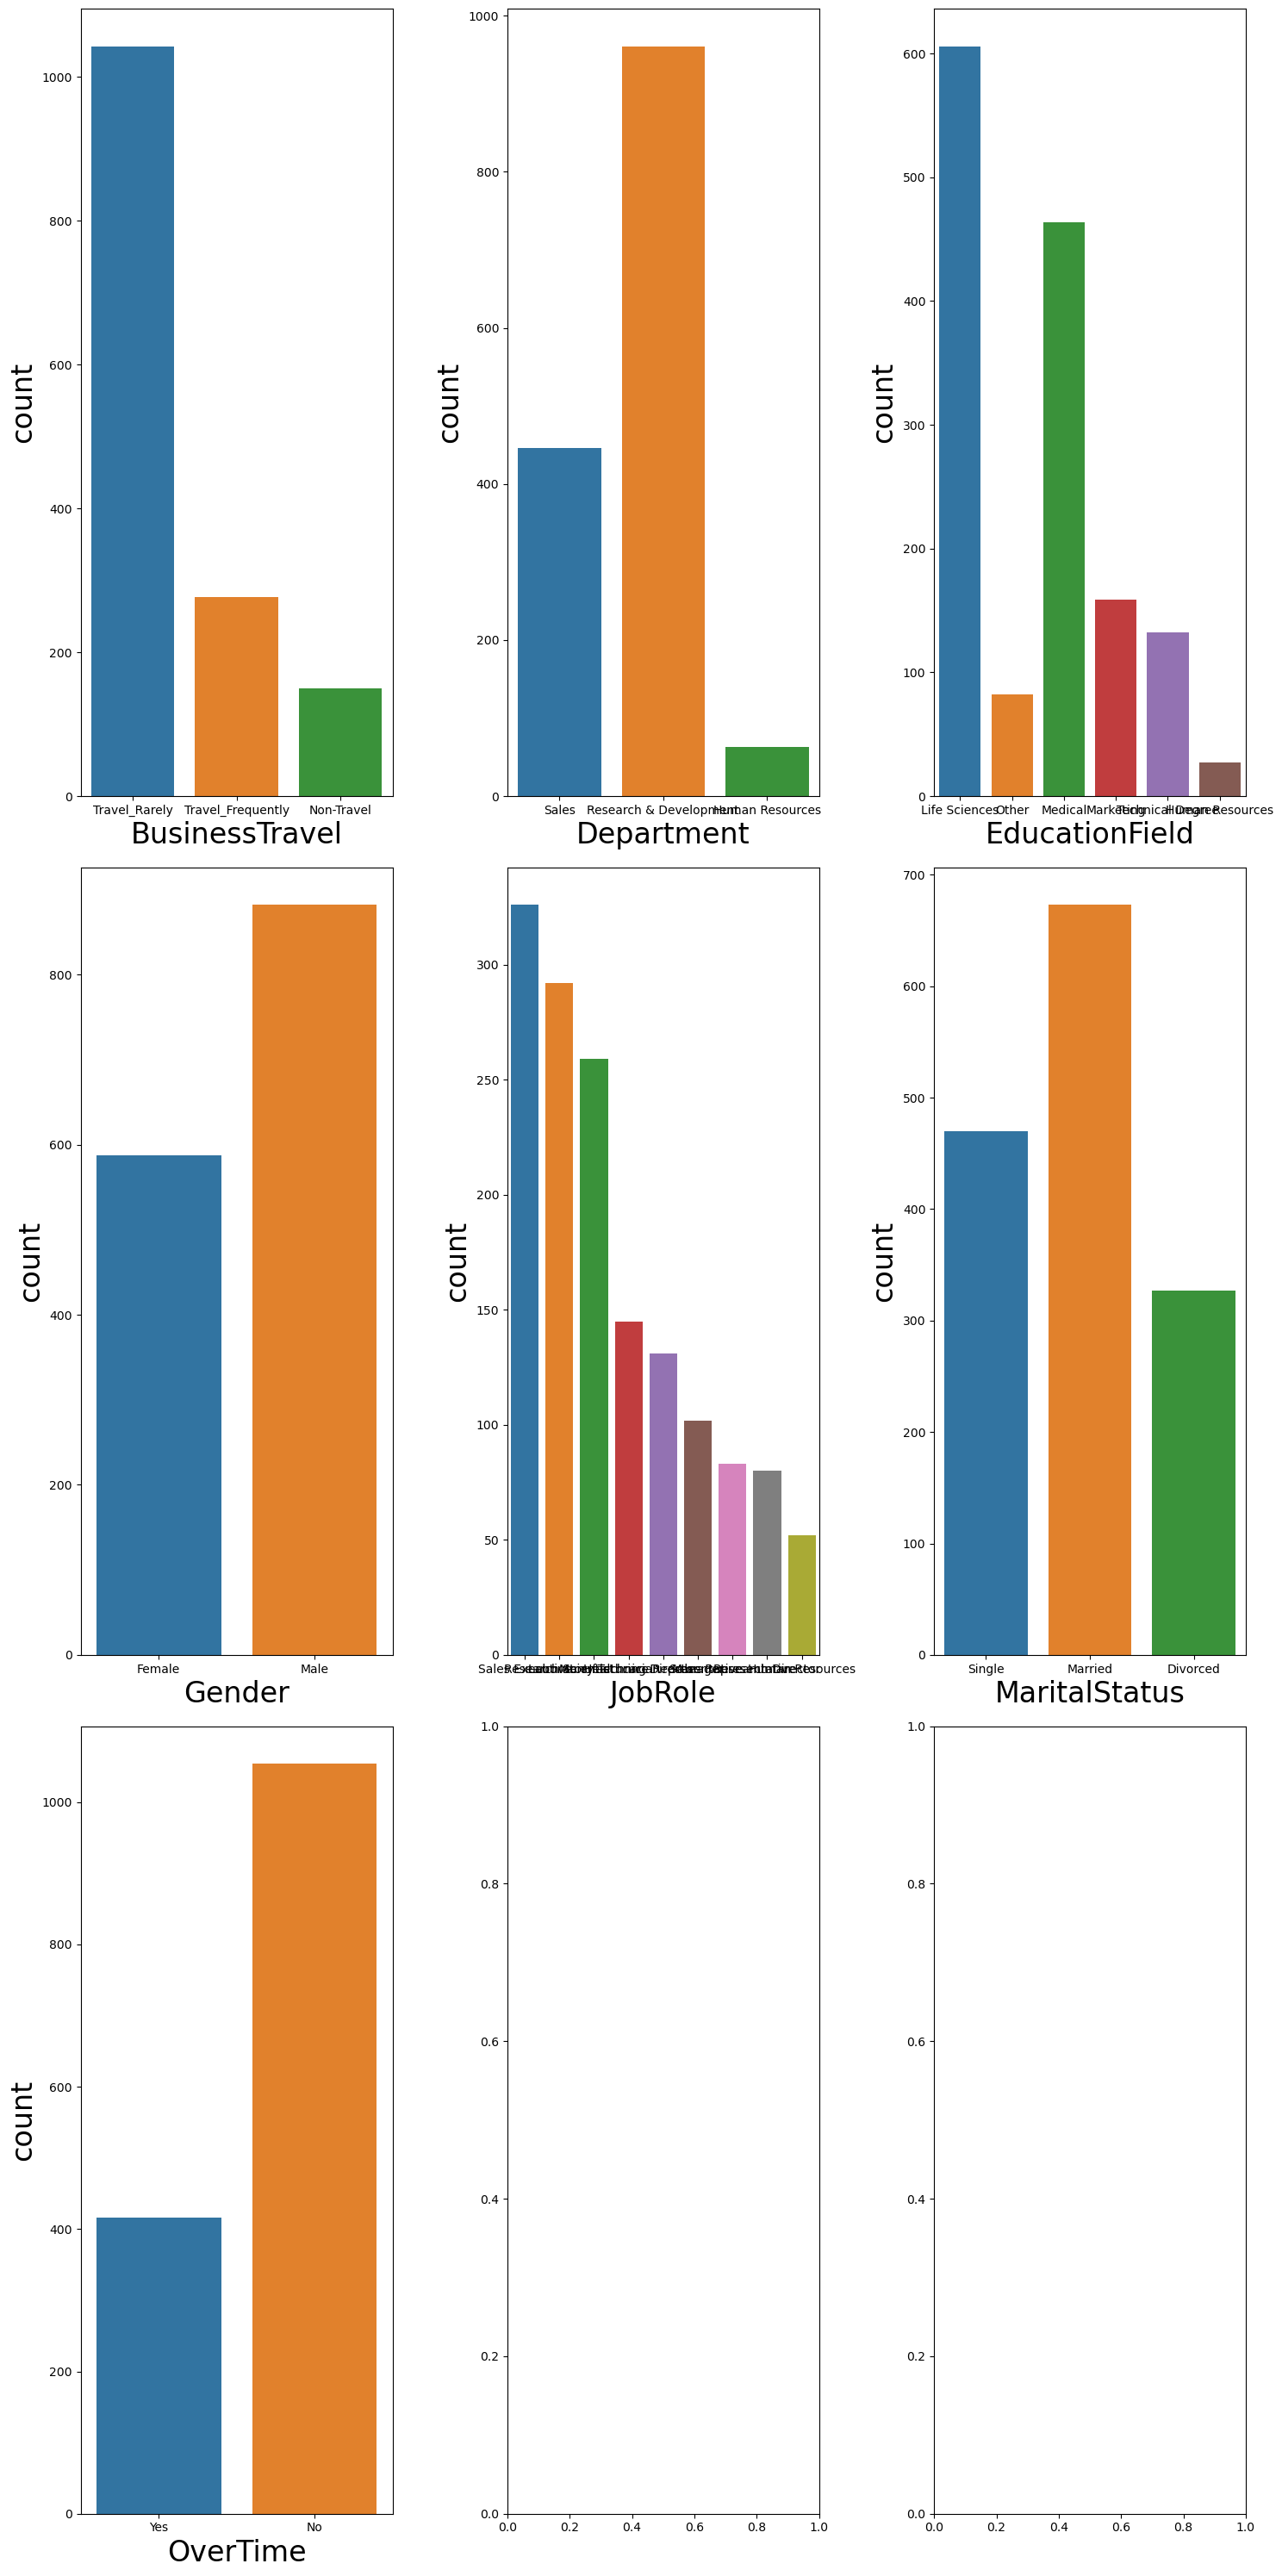

In [17]:
#Plotar gráficos de barra para contagem das variáveis categóricas segmentando em Turnover Sim ou Não.

col_num = df.select_dtypes(include = object).columns
y = 3
x = math.ceil(len(col_num)/y)

plt.rcParams["figure.figsize"] = [15, 10 * y]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(x,y)


row , column = 0 , 0
for col in col_num:
    sns.countplot( data = df, x = col, ax = axes[row][column] )
    column += 1
    if column == y:
        row += 1
        column = 0 

plt.show()

In [18]:
#Tabela de correlação entre as variáveis numéricas
corr = df.corr(numeric_only=True)
corr.style.background_gradient(cmap = 'RdBu', vmin = -1, vmax = 1)

In [19]:
corr = df[['YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']].corr()
corr.style.background_gradient(cmap = 'Blues')

In [20]:
corr = df[['turnover','Age','JobLevel','MonthlyIncome', 'TotalWorkingYears', 'YearsInCurrentRole', 'YearsWithCurrManager']].corr()
corr.style.background_gradient(cmap = 'RdBu', vmin = -1, vmax = 1)

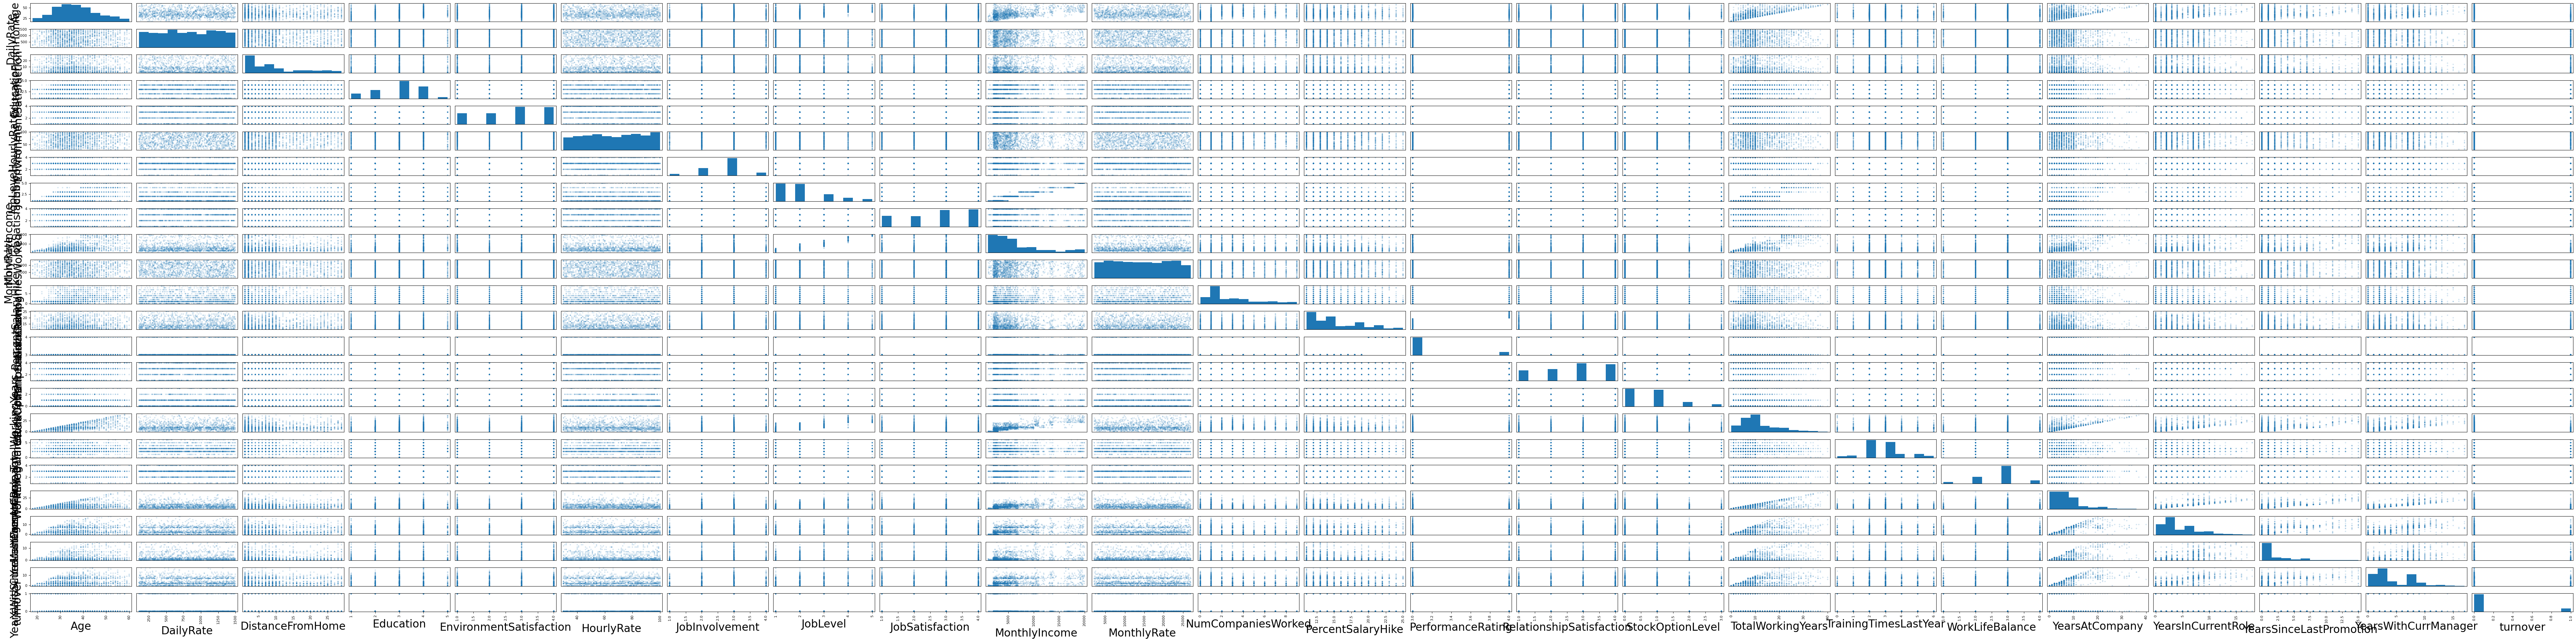

In [21]:
aux = scatter_matrix (df, figsize = (80,20), alpha = 0.2)

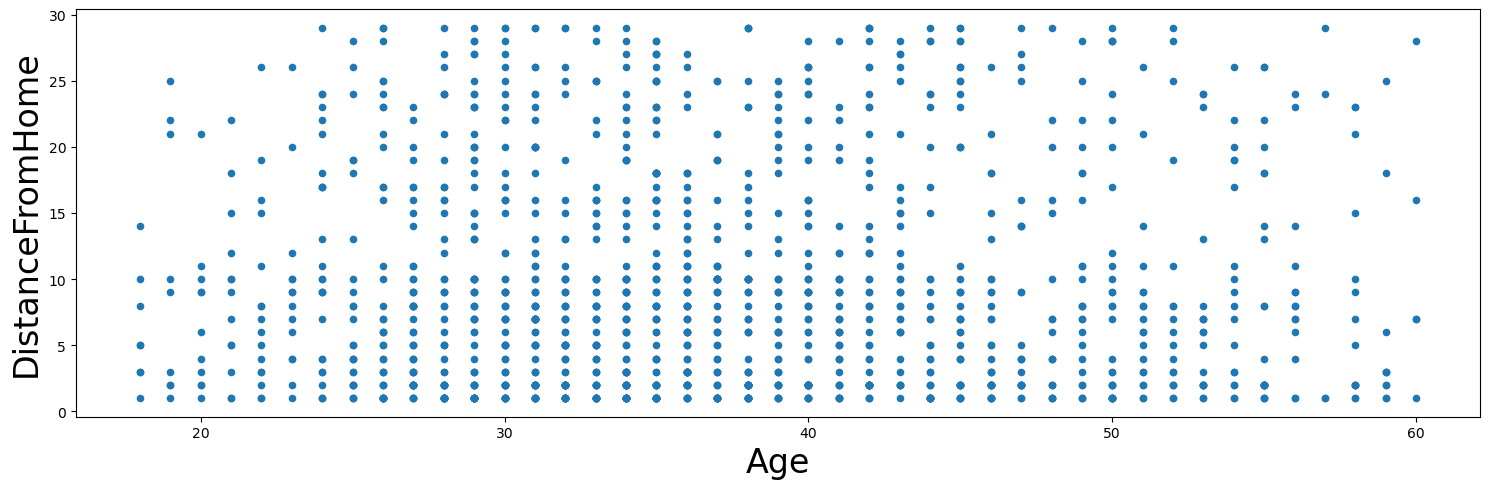

In [22]:
#Gráfico de dispersão para uma variável não correlacionada significamente.
aux = df.plot(x = 'Age', y = 'DistanceFromHome', kind = 'scatter', figsize = (15,5))

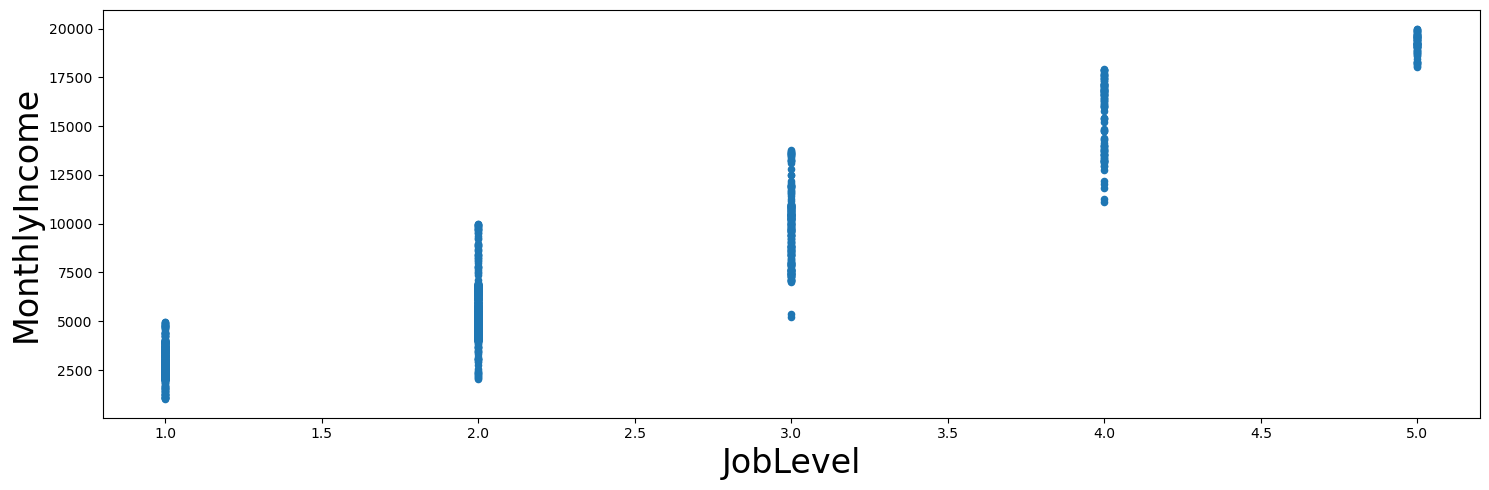

In [23]:
#Gráfico de dispersão para uma variável correlacionada significamente.
aux = df.plot(x = 'JobLevel', y = 'MonthlyIncome', kind = 'scatter', figsize = (15,5))

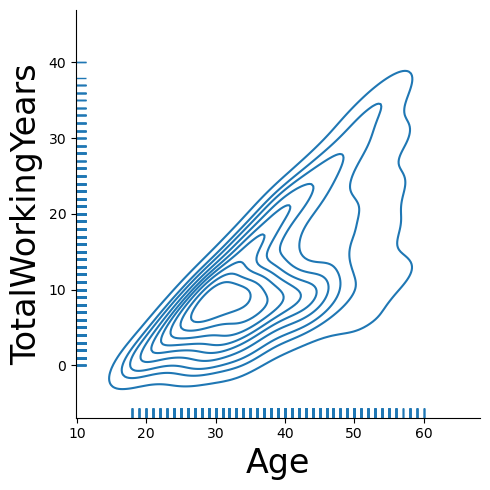

In [24]:
#Gráfico de dispersão para uma variável correlacionada significamente com os intervalos de valores

g = sns.displot(data = df, x="Age", y="TotalWorkingYears", kind="kde", rug=True)

Removendo outliers

In [25]:
# Detectando outliers no campo YearsAtCompany

media = np.mean(df['YearsAtCompany'])
desvio_padrao = np.std(df['YearsAtCompany'])
print(media, desvio_padrao)

7.0081632653061225 6.124440945793703


<Axes: xlabel='YearsAtCompany', ylabel='Count'>

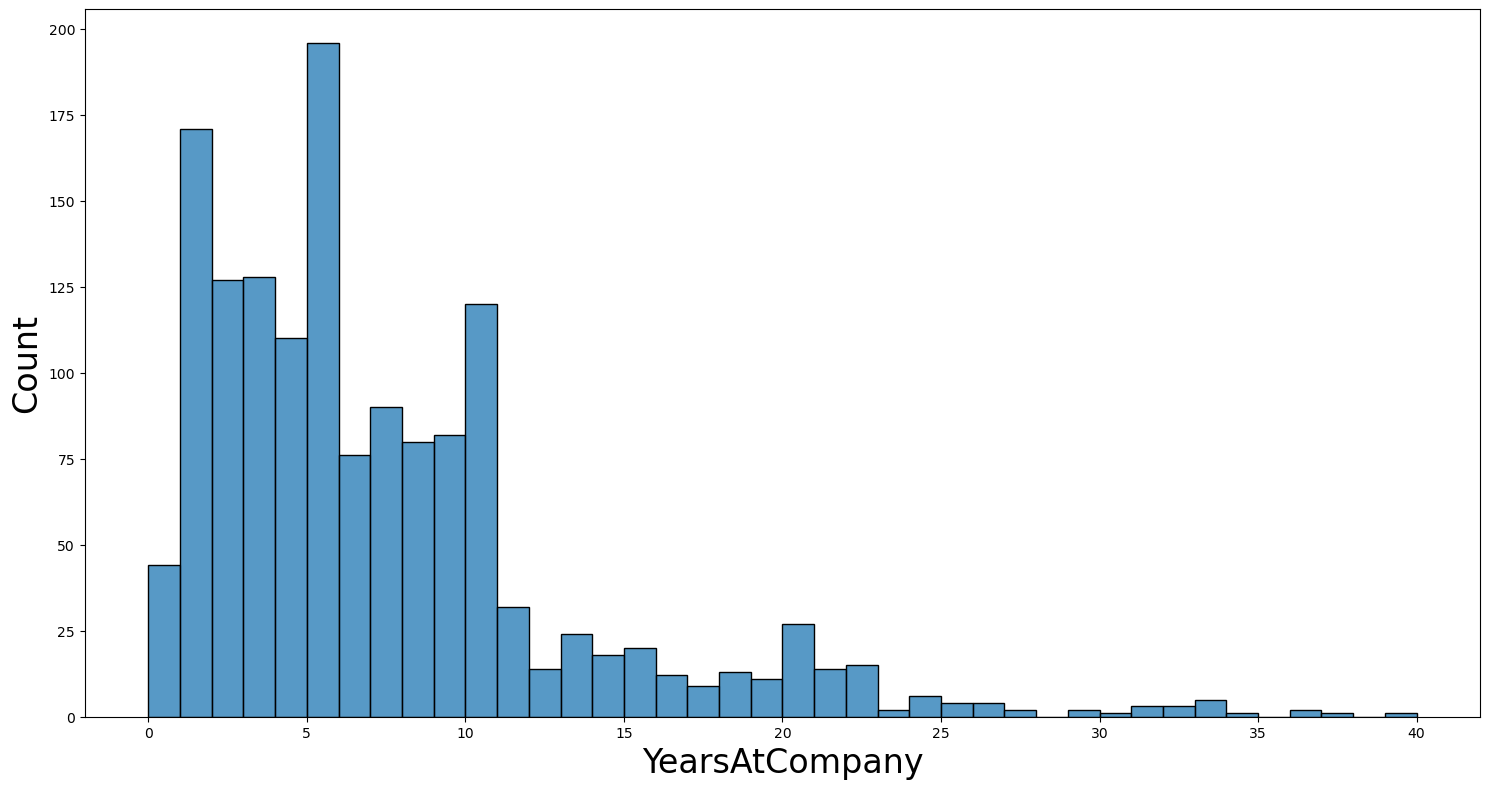

In [26]:
plt.figure(figsize=(15,8))
sns.histplot(data = df, x= 'YearsAtCompany', binwidth = 1)

In [27]:
# Removendo outliers pelo método do desvio padrão com tolerância de 4 desvios.

col_num = df.select_dtypes(exclude = object).columns

for col in col_num:
    media = np.mean(df[col])
    desvio_padrao = np.std(df[col])
    df = df.loc[(df[col] > (media - 5 * desvio_padrao)) & (df[col] < (media + 5 * desvio_padrao))]

df

Age     BusinessTravel  DailyRate              Department  \
0      41      Travel_Rarely       1102                   Sales   
1      49  Travel_Frequently        279  Research & Development   
2      37      Travel_Rarely       1373  Research & Development   
3      33  Travel_Frequently       1392  Research & Development   
4      27      Travel_Rarely        591  Research & Development   
...   ...                ...        ...                     ...   
1465   36  Travel_Frequently        884  Research & Development   
1466   39      Travel_Rarely        613  Research & Development   
1467   27      Travel_Rarely        155  Research & Development   
1468   49  Travel_Frequently       1023                   Sales   
1469   34      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                    1          2  Life Sciences                        2   
1                    8          1  Life Sciences                        3   
2                    2          2          Other                        4   
3                    3          4  Life Sciences                        4   
4                    2          1        Medical                        1   
...                ...        ...            ...                      ...   
1465                23          2        Medical                        3   
1466                 6          1        Medical                        4   
1467                 4          3  Life Sciences                        2   
1468                 2          3        Medical                        4   
1469                 8          3        Medical                        2   

      Gender  HourlyRate  JobInvolvement  JobLevel                    JobRole  \
0     Female          94               3         2            Sales Executive   
1       Male          61               2         2         Research Scientist   
2       Male          92               2         1      Laboratory Technician   
3     Female          56               3         1         Research Scientist   
4       Male          40               3         1      Laboratory Technician   
...      ...         ...             ...       ...                        ...   
1465    Male          41               4         2      Laboratory Technician   
1466    Male          42               2         3  Healthcare Representative   
1467    Male          87               4         2     Manufacturing Director   
1468    Male          63               2         2            Sales Executive   
1469    Male          82               4         2      Laboratory Technician   

      JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                   4        Single           5993        19479   
1                   2       Married           5130        24907   
2                   3        Single           2090         2396   
3                   3       Married           2909        23159   
4                   2       Married           3468        16632   
...               ...           ...            ...          ...   
1465                4       Married           2571        12290   
1466                1       Married           9991        21457   
1467                2       Married           6142         5174   
1468                2       Married           5390        13243   
1469                3       Married           4404        10228   

      NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  \
0                      8      Yes                 11                  3   
1                      1       No                 23                  4   
2                      6      Yes                 15                  3   
3                      1      Yes                 11                  3   
4                      9       No                 12                  3   
...                  ...      ...               

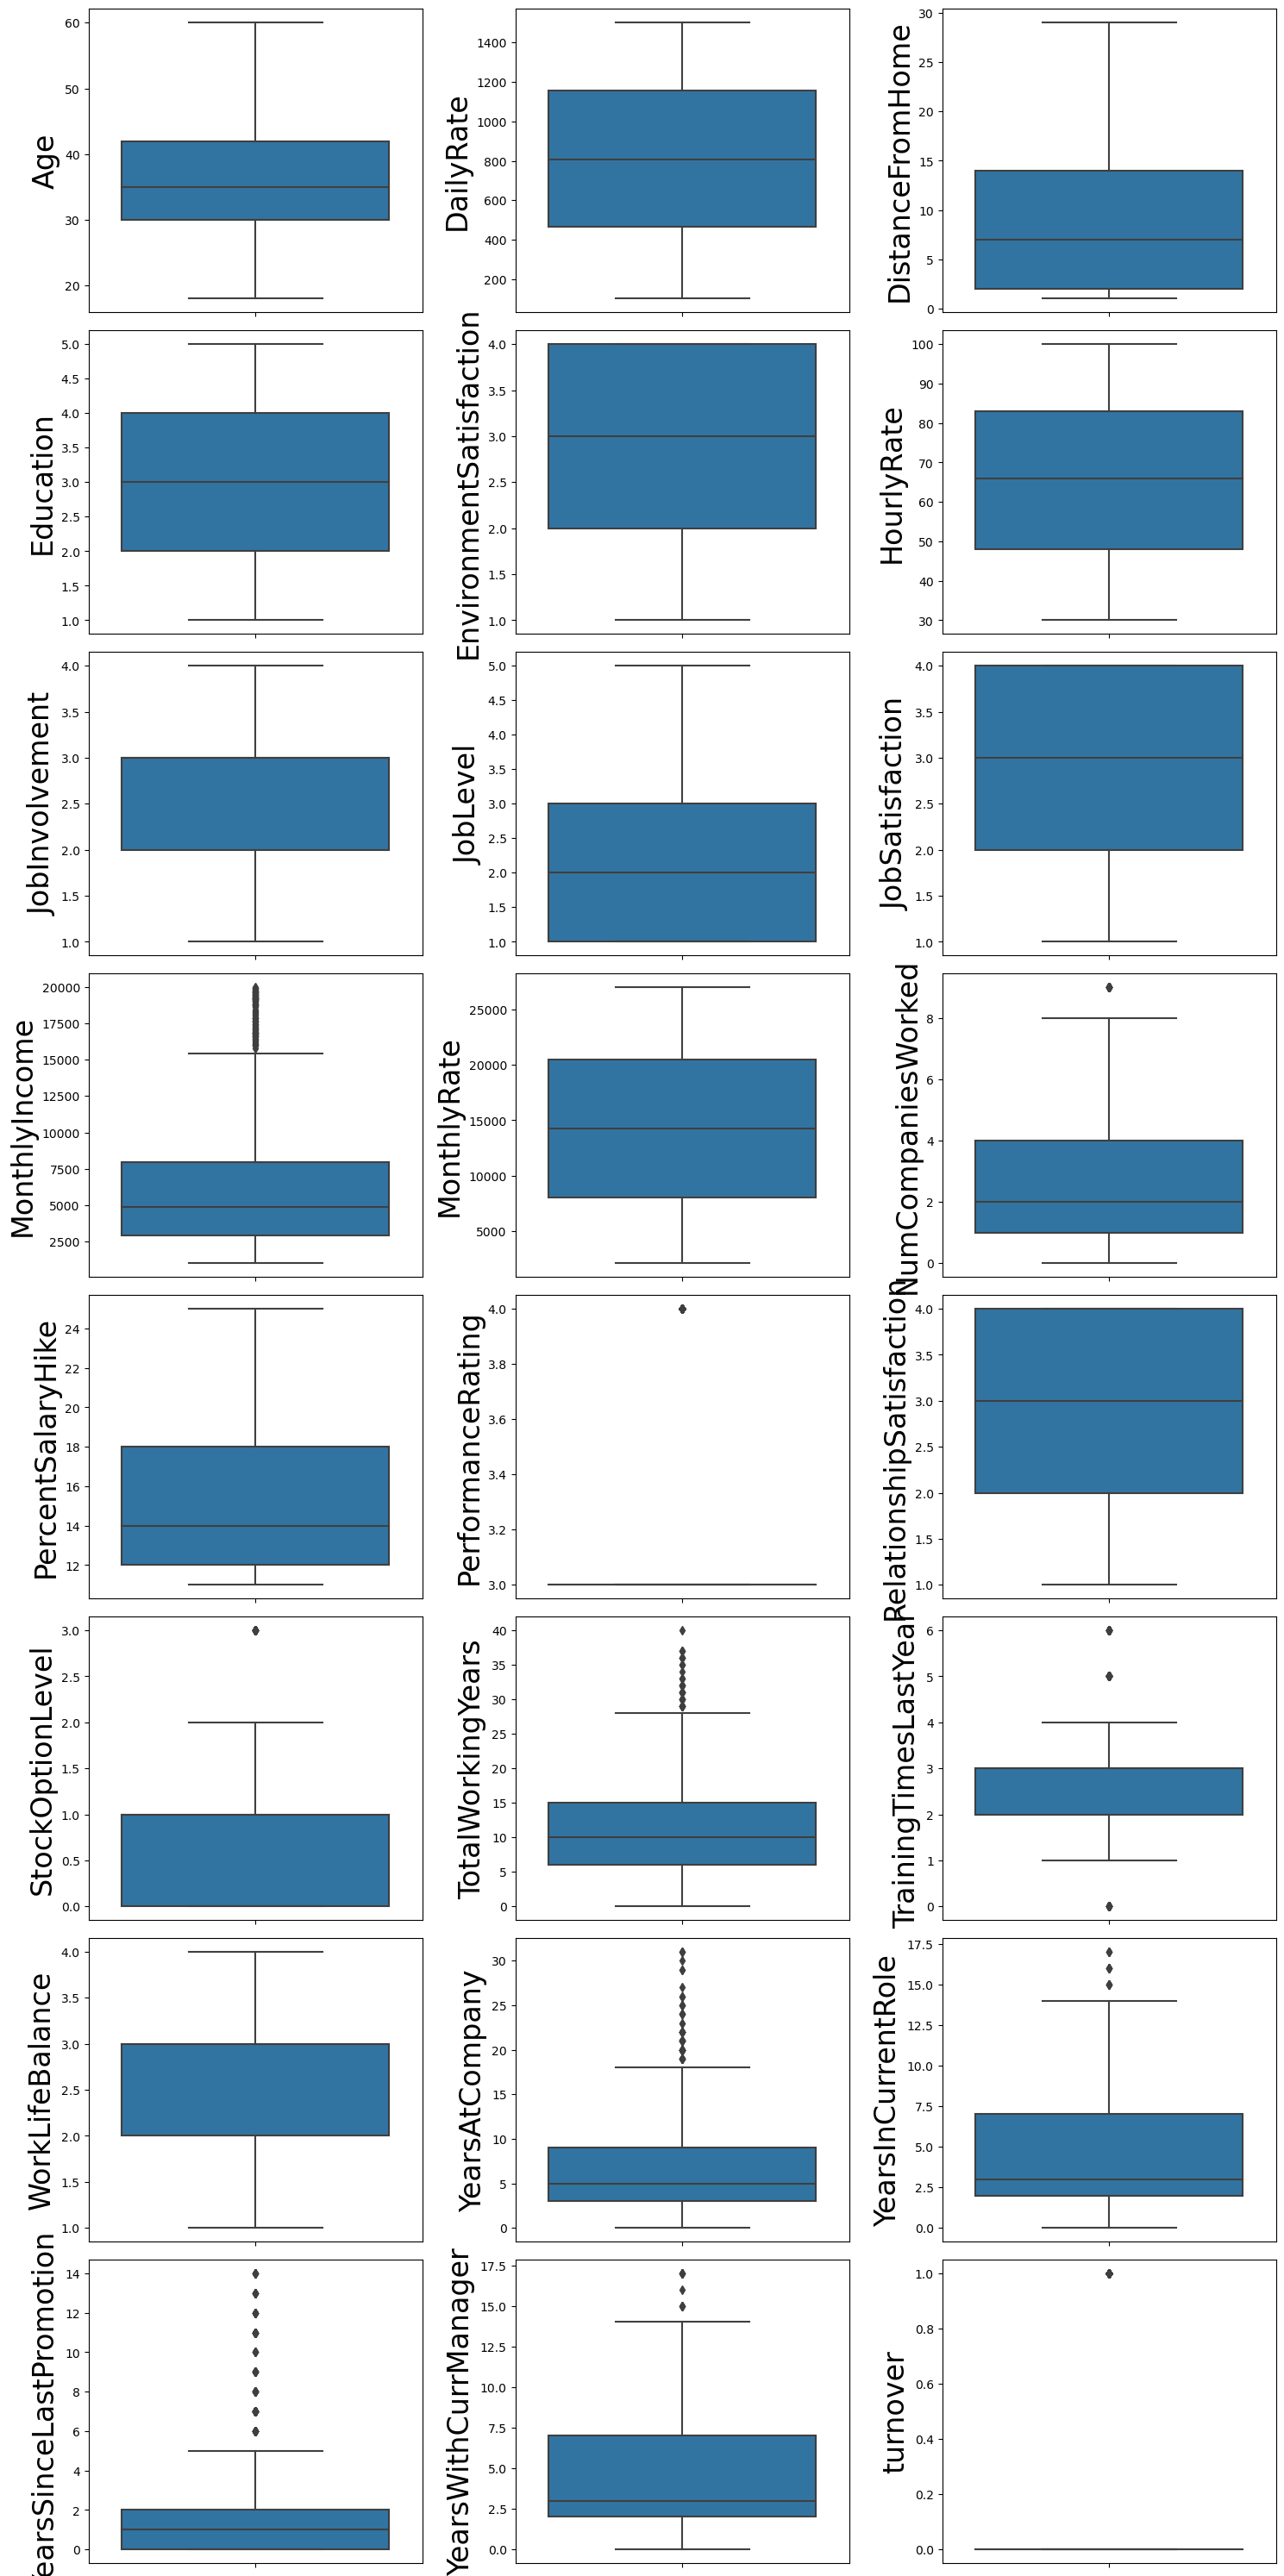

In [28]:
#Plotar gráficos boxplot para as variáveis numéricas

col_num = df.select_dtypes(exclude = object).columns
y = 3
x = math.ceil(len(col_num)/y)

plt.rcParams["figure.figsize"] = [15, 10 * y]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(x,y)


row , column = 0 , 0
for col in col_num:
    sns.boxplot( data = df, y = col, ax = axes[row][column] )
    column += 1
    if column == y:
        row += 1
        column = 0 

plt.show()

Preparação dos Dados para os Modelos de Aprendizado de Máquina

In [5]:
base_modelo = df.copy()
base_modelo['Gender'] = np.where(base_modelo['Gender'] == 'Male', 1, 0)
base_modelo['OverTime'] = np.where(base_modelo['OverTime'] == 'Yes', 1, 0)
base_modelo

Age     BusinessTravel  DailyRate              Department  \
0      41      Travel_Rarely       1102                   Sales   
1      49  Travel_Frequently        279  Research & Development   
2      37      Travel_Rarely       1373  Research & Development   
3      33  Travel_Frequently       1392  Research & Development   
4      27      Travel_Rarely        591  Research & Development   
...   ...                ...        ...                     ...   
1465   36  Travel_Frequently        884  Research & Development   
1466   39      Travel_Rarely        613  Research & Development   
1467   27      Travel_Rarely        155  Research & Development   
1468   49  Travel_Frequently       1023                   Sales   
1469   34      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                    1          2  Life Sciences                        2   
1                    8          1  Life Sciences                        3   
2                    2          2          Other                        4   
3                    3          4  Life Sciences                        4   
4                    2          1        Medical                        1   
...                ...        ...            ...                      ...   
1465                23          2        Medical                        3   
1466                 6          1        Medical                        4   
1467                 4          3  Life Sciences                        2   
1468                 2          3        Medical                        4   
1469                 8          3        Medical                        2   

      Gender  HourlyRate  JobInvolvement  JobLevel                    JobRole  \
0          0          94               3         2            Sales Executive   
1          1          61               2         2         Research Scientist   
2          1          92               2         1      Laboratory Technician   
3          0          56               3         1         Research Scientist   
4          1          40               3         1      Laboratory Technician   
...      ...         ...             ...       ...                        ...   
1465       1          41               4         2      Laboratory Technician   
1466       1          42               2         3  Healthcare Representative   
1467       1          87               4         2     Manufacturing Director   
1468       1          63               2         2            Sales Executive   
1469       1          82               4         2      Laboratory Technician   

      JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                   4        Single           5993        19479   
1                   2       Married           5130        24907   
2                   3        Single           2090         2396   
3                   3       Married           2909        23159   
4                   2       Married           3468        16632   
...               ...           ...            ...          ...   
1465                4       Married           2571        12290   
1466                1       Married           9991        21457   
1467                2       Married           6142         5174   
1468                2       Married           5390        13243   
1469                3       Married           4404        10228   

      NumCompaniesWorked  OverTime  PercentSalaryHike  PerformanceRating  \
0                      8         1                 11                  3   
1                      1         0                 23                  4   
2                      6         1                 15                  3   
3                      1         1                 11                  3   
4                      9         0                 12                  3   
...                  ...       ...        

In [6]:
# Normalização dos dados numéricos
cols_normalizar = [
    'Age', "DailyRate", "DistanceFromHome", "Education", "EnvironmentSatisfaction", "HourlyRate", "JobInvolvement", 
    "JobLevel", "JobSatisfaction", "MonthlyIncome", "MonthlyRate", "NumCompaniesWorked", "PercentSalaryHike", 
    "PerformanceRating", "RelationshipSatisfaction", "StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear",
     "WorkLifeBalance", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager" ]

base_modelo[cols_normalizar] = StandardScaler().fit_transform(base_modelo[cols_normalizar])

# One Hot Encoding das variáveis categóricas
cols_categoricas = [
  'BusinessTravel', 'Department', "EducationField",  "JobRole", "MaritalStatus"] 

one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown = 'ignore'),
    cols_categoricas),
    remainder='passthrough')

base_modelo = one_hot_enc.fit_transform(base_modelo)
base_modelo = pd.DataFrame(base_modelo, columns=one_hot_enc.get_feature_names_out())
base_modelo.columns = base_modelo.columns.str.replace('onehotencoder__', '')
base_modelo.columns = base_modelo.columns.str.replace('remainder__', '')
base_modelo

BusinessTravel_Non-Travel  BusinessTravel_Travel_Frequently  \
0                           0.0                               0.0   
1                           0.0                               1.0   
2                           0.0                               0.0   
3                           0.0                               1.0   
4                           0.0                               0.0   
...                         ...                               ...   
1465                        0.0                               1.0   
1466                        0.0                               0.0   
1467                        0.0                               0.0   
1468                        0.0                               1.0   
1469                        0.0                               0.0   

      BusinessTravel_Travel_Rarely  Department_Human Resources  \
0                              1.0                         0.0   
1                              0.0                         0.0   
2                              1.0                         0.0   
3                              0.0                         0.0   
4                              1.0                         0.0   
...                            ...                         ...   
1465                           0.0                         0.0   
1466                           1.0                         0.0   
1467                           1.0                         0.0   
1468                           0.0                         0.0   
1469                           1.0                         0.0   

      Department_Research & Development  Department_Sales  \
0                                   0.0               1.0   
1                                   1.0               0.0   
2                                   1.0               0.0   
3                                   1.0               0.0   
4                                   1.0               0.0   
...                                 ...               ...   
1465                                1.0               0.0   
1466                                1.0               0.0   
1467                                1.0               0.0   
1468                                0.0               1.0   
1469                                1.0               0.0   

      EducationField_Human Resources  EducationField_Life Sciences  \
0                                0.0                           1.0   
1                                0.0                           1.0   
2                                0.0                           0.0   
3                                0.0                           1.0   
4                                0.0                           0.0   
...                              ...                           ...   
1465                             0.0                           0.0   
1466                             0.0                           0.0   
1467                             0.0                           1.0   
1468                             0.0                           0.0   
1469                             0.0                           0.0   

      EducationField_Marketing  EducationField_Medical  EducationField_Other  \
0                          0.0                     0.0                   0.0   
1                          0.0                     0.0                   0.0   
2                          0.0                     0.0                   1.0   
3                          0.0                     0.0                   0.0   
4                          0.0                     1.0                   0.0   
...                        ...                     ...                   ...   
1465                       0.0                     1.0                   0.0   
1466                       0.0                     1.0                   0.0   
1467                       0.0                     0.0                   0.0   
1468      

In [7]:
#Divisão em treino e teste e overmsampling da base de treino

X = base_modelo.drop(['turnover'], axis = 1)
y = base_modelo['turnover']
X = X.astype('float')
y = y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

oversample = SMOTE(random_state = 123)
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [8]:
y_train.value_counts()

turnover
0    977
1    977
Name: count, dtype: int64

RANDOM FOREST

In [ ]:
#MLFLOW + HYPEROPT + RANDOM FOREST executado no Databricks

def objective(params):
    mlflow.sklearn.autolog()
    with mlflow.start_run(nested = True):
        rf = RandomForestClassifier(**params, random_state = 123)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        scores = cross_val_score(rf, X_train, y_train, cv = 3, scoring = 'f1')
        best_score = max(scores)
        loss = 1 - best_score
        mlflow.log_metric("score", rf.score(X_test, y_test))
        return {'loss': loss, 'params': params, 'status': STATUS_OK}

param_space = {
    'max_depth': hp.choice('max_depth', range(5,10)),
    'min_samples_leaf' : hp.choice('min_samples_leaf', range(2,6)),
    'max_features': hp.choice('max_features', ['sqrt', 'log2']),
    'n_estimators': hp.choice('n_estimators', range(50,1000)),
    'criterion': hp.choice('criterion', ['gini', 'entropy'])}

with mlflow.start_run(run_name = 'hyperopt_randomforest') as run:
    best = fmin(fn = objective, space = param_space, algo = tpe.suggest, max_evals = 200, trials = Trials())    

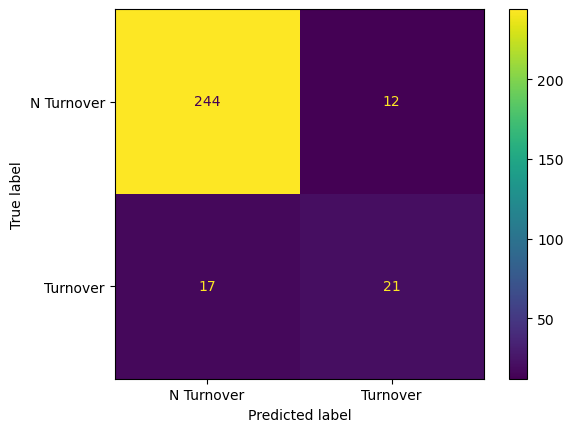

In [9]:
# experimentar modelo com o parâmetro específico para o modelo final
rf = RandomForestClassifier(random_state = 123, n_estimators = 259, criterion = 'gini', min_samples_split = 6,max_features = 'sqrt', max_depth = 6)
rf.fit(X_train, y_train)
y_predict = rf.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_predict, labels=rf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                      display_labels=['N Turnover', 'Turnover'],
                                                                            
                                     )
disp.plot()

In [10]:
print(f"model score on training data: {rf.score(X_train, y_train)}")
print(f"model score on testing data: {rf.score(X_test, y_test)}")

model score on training data: 0.9498464687819856
model score on testing data: 0.9013605442176871


Axes(0.125,0.11;0.775x0.77)


Text(0.5, 1.0, 'Random Forest Coeficient')

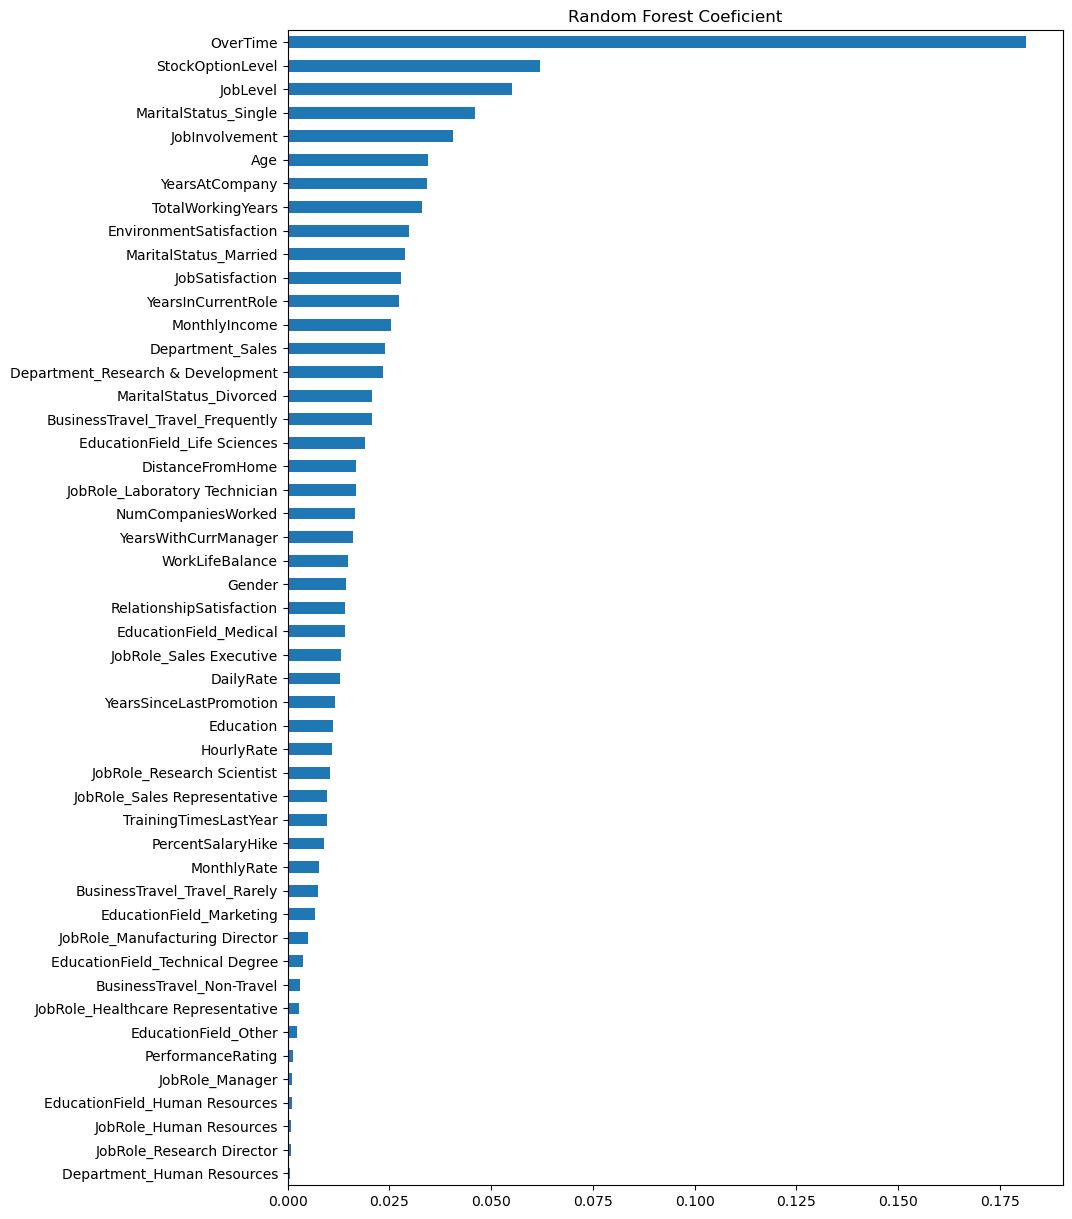

In [11]:
#peso de importância das variáveis
weights = pd.Series(rf.feature_importances_,index=X.columns.values).sort_values(ascending=True)
print(weights.sort_values(ascending = True).plot(kind = 'barh',figsize=(10, 15)))
plt.title("Random Forest Coeficient")

In [12]:
# Encontrando os parâmetros mais relevantes da base através do RFE
base_modelo_logistica = base_modelo.copy()
base_modelo_logistica_vars = base_modelo_logistica.columns.values.tolist()

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(X_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True False  True False  True  True  True False  True  True False
 False False  True  True False  True False  True  True  True False  True
 False False False False  True False False  True False  True False False
  True  True False False False False  True False False  True  True  True
 False]
[ 1  1  3  1  6  1  1  1 22  1  1  5 16  9  1  1  8  1  7  1  1  1 25  1
 13 14  4 23  1  2 26  1 18  1 17 24  1  1 19 20 10 21  1 15 12  1  1  1
 11]


In [13]:
# Selecionando somente os parâmetros mais relevantes da base através do RFE
colunas = []

for i in range(len(rfe.support_)):
    if rfe.support_[i] == True:
        colunas.append(base_modelo_logistica.columns[i])
        
X_train2 = X_train[colunas]

In [14]:
#  Removendo variáveis com p valor alto distorcendo da base
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train2)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.453039
         Iterations 8
                                 Results: Logit
Model:                   Logit                 Method:                MLE        
Dependent Variable:      turnover              Pseudo R-squared:      0.346      
Date:                    2023-10-15 14:42      AIC:                   1818.4780  
No. Observations:        1954                  BIC:                   1952.3412  
Df Model:                23                    Log-Likelihood:        -885.24    
Df Residuals:            1930                  LL-Null:               -1354.4    
Converged:               1.0000                LLR p-value:           1.6790e-183
No. Iterations:          8.0000                Scale:                 1.0000     
---------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------

In [15]:
colunas.remove('Department_Sales')
colunas.remove('EducationField_Human Resources')
colunas.remove('JobRole_Sales Executive')
colunas.remove('JobRole_Sales Representative')

X_train3 = X_train2[colunas]
X_test3 = X_test[colunas]

In [16]:
logreg = LogisticRegression()
logreg.fit(X_train3, y_train)
y_pred = logreg.predict(X_test3)
print(f"model score on training data: {logreg.score(X_train3, y_train)}")
print(f"model score on testing data: {logreg.score(X_test3, y_test)}")

model score on training data: 0.7830092118730808
model score on testing data: 0.7142857142857143


In [17]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[184  72]
 [ 12  26]]


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.72      0.81       256
           1       0.27      0.68      0.38        38

    accuracy                           0.71       294
   macro avg       0.60      0.70      0.60       294
weighted avg       0.85      0.71      0.76       294

